In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid",
              context="notebook",
            #   font_scale=1.5
              )

# plot save path:
plot_save_path = 'C:/Users/Mees/OneDrive - HvA/Documents/GitHub/MDDB-Master-Thesis-Cold-Start-problem-in-RecSys/plots/'

# RL Agent Performance Evaluation

## Loss function

In [24]:
loss = pd.read_csv('data\wandb csvs\loss - epochs.csv')
display(loss.head())
loss.shape
loss.columns

,Step,revived-pine-22 - loss,revived-pine-22 - loss__MIN,revived-pine-22 - loss__MAX,true-firefly-21 - loss,true-firefly-21 - loss__MIN,true-firefly-21 - loss__MAX,colorful-dragon-18 - loss,colorful-dragon-18 - loss__MIN,colorful-dragon-18 - loss__MAX,...,sandy-sky-16 - loss__MAX,happy-morning-14 - loss,happy-morning-14 - loss__MIN,happy-morning-14 - loss__MAX,silvery-pine-13 - loss,silvery-pine-13 - loss__MIN,silvery-pine-13 - loss__MAX,rich-firebrand-12 - loss,rich-firebrand-12 - loss__MIN,rich-firebrand-12 - loss__MAX
0,81,89061392.0,89061392.0,89061392.0,771436928,771436928,771436928,567166976,567166976,567166976,...,57580584.0,566174592,566174592,566174592,623968832,623968832,623968832,1481853824,1481853824,1481853824
1,85,42296600.0,42296600.0,42296600.0,371403744,371403744,371403744,251400128,251400128,251400128,...,32539684.0,290301888,290301888,290301888,311384384,311384384,311384384,739667456,739667456,739667456
2,88,21262540.0,21262540.0,21262540.0,158269840,158269840,158269840,154330944,154330944,154330944,...,22913844.0,163730176,163730176,163730176,183724256,183724256,183724256,417843008,417843008,417843008
3,94,19191756.0,19191756.0,19191756.0,109592192,109592192,109592192,184919024,184919024,184919024,...,16697344.0,115884352,115884352,115884352,174304864,174304864,174304864,274684096,274684096,274684096
4,102,21270880.0,21270880.0,21270880.0,149418816,149418816,149418816,251282528,251282528,251282528,...,15888853.0,131484312,131484312,131484312,261728432,261728432,261728432,320861696,320861696,320861696


Index(['Step', 'revived-pine-22 - loss', 'revived-pine-22 - loss__MIN',
       'revived-pine-22 - loss__MAX', 'true-firefly-21 - loss',
       'true-firefly-21 - loss__MIN', 'true-firefly-21 - loss__MAX',
       'colorful-dragon-18 - loss', 'colorful-dragon-18 - loss__MIN',
       'colorful-dragon-18 - loss__MAX', 'jolly-dew-17 - loss',
       'jolly-dew-17 - loss__MIN', 'jolly-dew-17 - loss__MAX',
       'sandy-sky-16 - loss', 'sandy-sky-16 - loss__MIN',
       'sandy-sky-16 - loss__MAX', 'happy-morning-14 - loss',
       'happy-morning-14 - loss__MIN', 'happy-morning-14 - loss__MAX',
       'silvery-pine-13 - loss', 'silvery-pine-13 - loss__MIN',
       'silvery-pine-13 - loss__MAX', 'rich-firebrand-12 - loss',
       'rich-firebrand-12 - loss__MIN', 'rich-firebrand-12 - loss__MAX'],
      dtype='object')

### Loss function (without changing the reward function)

In [25]:
# select the columns of interest
experiment1 = loss[['Step', 'rich-firebrand-12 - loss', 'silvery-pine-13 - loss', 'happy-morning-14 - loss', 'sandy-sky-16 - loss']]

# rename the columns
experiment1.columns = ['step', '5', '10', '15', '100']

# convert to long format
experiment1 = experiment1.melt(
    id_vars='step',
    value_vars=['5', '10', '15', '100'], 
    value_name='loss',
    var_name='n_history', 
    )

experiment1

,step,n_history,loss
0,81,5,1.481854e+09
1,85,5,7.396675e+08
2,88,5,4.178430e+08
3,94,5,2.746841e+08
4,102,5,3.208617e+08
...,...,...,...
11931,18508,100,8.192614e+07
11932,18515,100,6.582376e+07
11933,18522,100,4.066632e+07
11934,18530,100,7.589683e+07


<Axes: xlabel='step', ylabel='loss'>

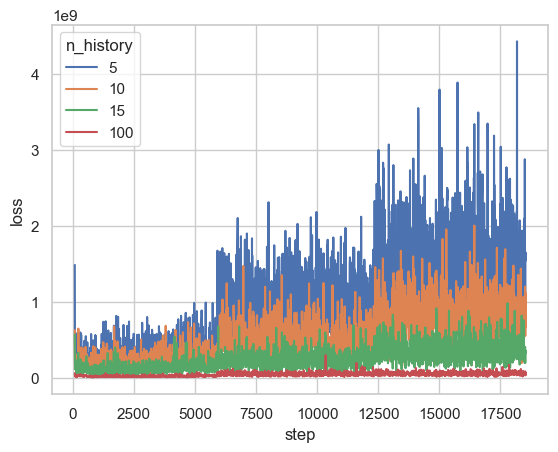

In [26]:
sns.lineplot(data=experiment1, x='step', y='loss', hue='n_history')

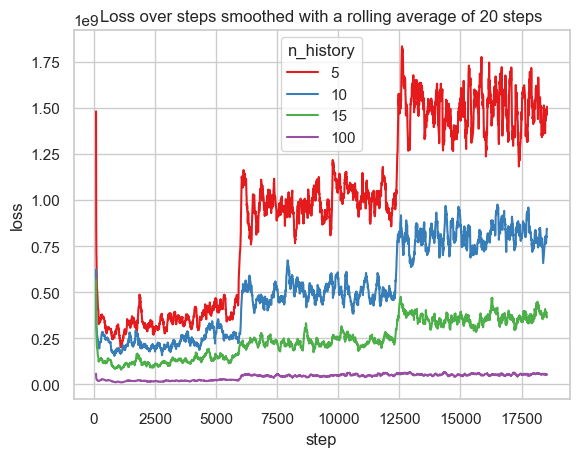

In [27]:
# add a rolling average (20 steps average)
experiment1['rolling_average'] = experiment1.groupby('n_history')['loss'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())

sns.lineplot(data=experiment1, x='step', y='rolling_average', hue='n_history',
             palette='Set1')
# set y-axis name to 'loss'
plt.ylabel('loss')

# set the title of the plot
plt.title('Loss over steps smoothed with a rolling average of 20 steps')

# save the plot as a .png file
plt.savefig(plot_save_path + 'loss_vs_epochs.png', dpi=300)

### Loss function click = 0

In [28]:
# select the columns of interest
experiment2 = loss[['Step', 'jolly-dew-17 - loss', 'colorful-dragon-18 - loss', 'true-firefly-21 - loss', 'revived-pine-22 - loss']]

# rename the columns
experiment2.columns = ['step', '5', '10', '15', '100']

# convert to long format
experiment2 = experiment2.melt(
    id_vars='step',
    value_vars=['5', '10', '15', '100'], 
    value_name='loss',
    var_name='n_history', 
    )

experiment2

,step,n_history,loss
0,81,5,1.755439e+09
1,85,5,1.026661e+09
2,88,5,5.760957e+08
3,94,5,3.234032e+08
4,102,5,2.919643e+08
...,...,...,...
11931,18508,100,4.693576e+07
11932,18515,100,1.158896e+08
11933,18522,100,5.857780e+07
11934,18530,100,7.300808e+07


<Axes: xlabel='step', ylabel='loss'>

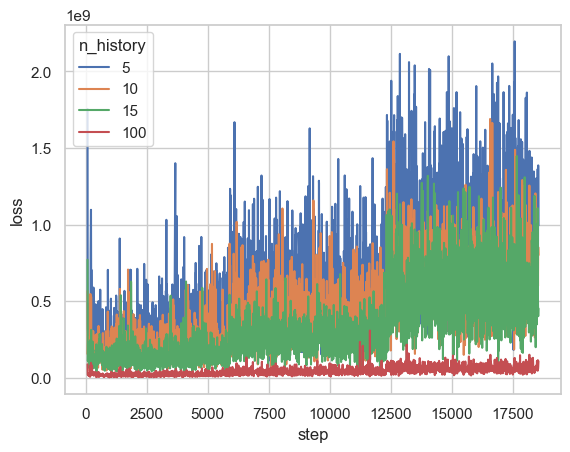

In [29]:
sns.lineplot(data=experiment2, x='step', y='loss', hue='n_history')

In [30]:
# add a rolling average (20 steps average)
experiment2['rolling_average'] = experiment2.groupby('n_history')['loss'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())

# concat the two experiments keys exp1 and exp2
experiment1['reward_func'] = 'click=10'
experiment2['reward_func'] = 'click=0'
experiment12 = pd.concat([experiment1, experiment2])
experiment12

,step,n_history,loss,rolling_average,reward_func
0,81,5,1.481854e+09,1.481854e+09,click=10
1,85,5,7.396675e+08,1.110761e+09,click=10
2,88,5,4.178430e+08,8.797881e+08,click=10
3,94,5,2.746841e+08,7.285121e+08,click=10
4,102,5,3.208617e+08,6.469820e+08,click=10
...,...,...,...,...,...
11931,18508,100,4.693576e+07,6.385441e+07,click=0
11932,18515,100,1.158896e+08,6.689175e+07,click=0
11933,18522,100,5.857780e+07,6.708617e+07,click=0
11934,18530,100,7.300808e+07,6.911646e+07,click=0


c:\Users\Mees\anaconda3\envs\datascience\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


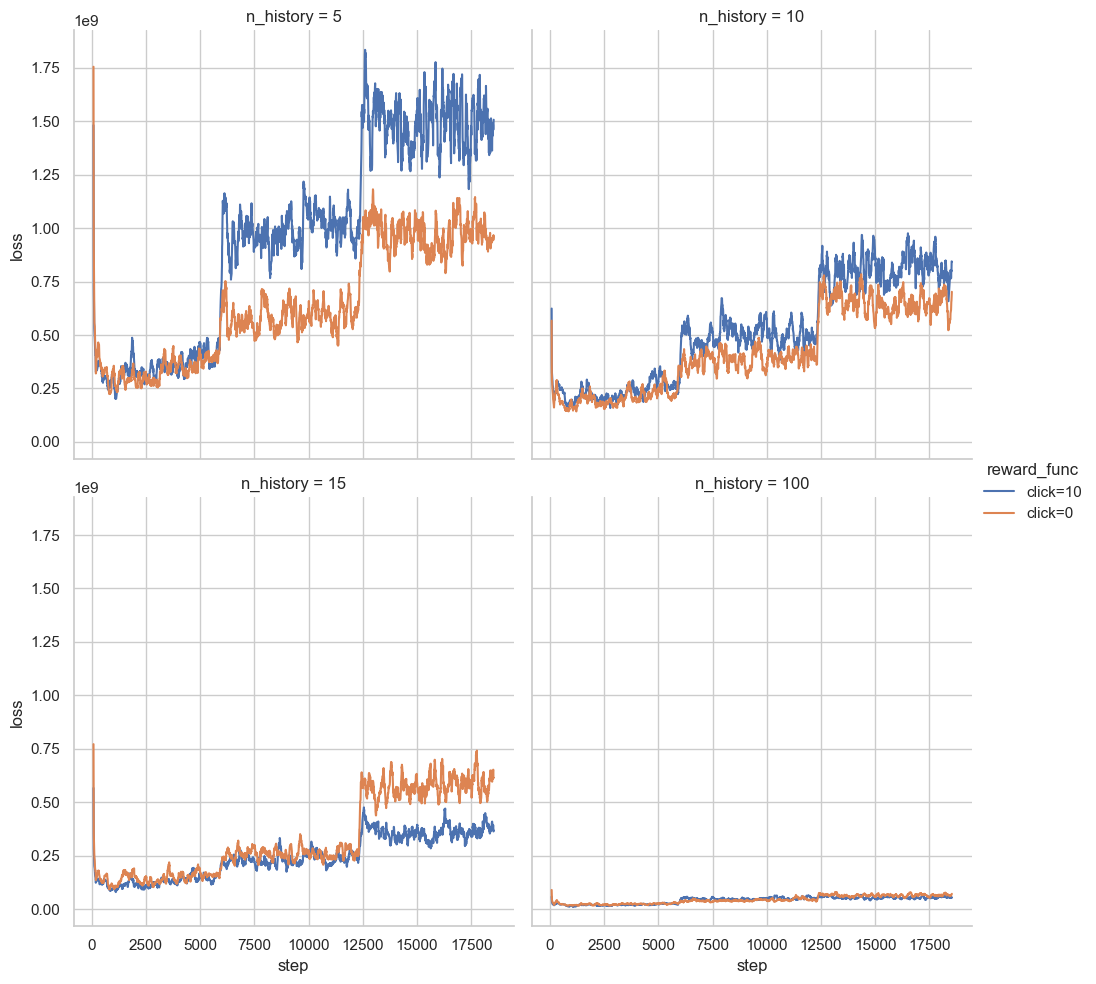

In [31]:
fig = sns.relplot(data=experiment12, x='step', y='rolling_average', 
            hue='reward_func', 
            col='n_history',
            col_wrap=2,
            kind='line')

fig.set_ylabels('loss')
fig.set_xlabels('step')

fig.savefig(plot_save_path + 'loss_vs_epochs_click_10_vs_click_0.png', dpi=300)

# Recommender System Performance Evaluation

## MRR mean reciprocal rank evaluation

In [32]:
mrr_df = pd.read_excel(
    "Results summarized.xlsx",
    sheet_name='MRR.T',
    index_col=0)

mrr_df.head()

,VSTAN,History 5,History 10,History 15,History 100
MRR@,,,,,
0,0.192343,0.000151,0.000061,0.000069,0.000530
1,0.213099,0.000153,0.000150,0.000127,0.000102
2,0.184941,0.000055,0.000318,0.000077,0.000124
3,0.173483,0.000332,0.000210,0.000105,0.000092
4,0.174696,0.000114,0.000111,0.000413,0.000573


In [33]:
print(mrr_df.to_latex(index=True, 
                      float_format="%.5f",
                      ))

\begin{tabular}{lrrrrr}
\toprule
 & VSTAN & History 5 & History 10 & History 15 & History 100 \\
MRR@ &  &  &  &  &  \\
\midrule
0 & 0.19234 & 0.00015 & 0.00006 & 0.00007 & 0.00053 \\
1 & 0.21310 & 0.00015 & 0.00015 & 0.00013 & 0.00010 \\
2 & 0.18494 & 0.00005 & 0.00032 & 0.00008 & 0.00012 \\
3 & 0.17348 & 0.00033 & 0.00021 & 0.00010 & 0.00009 \\
4 & 0.17470 & 0.00011 & 0.00011 & 0.00041 & 0.00057 \\
5 & 0.16559 & 0.17406 & 0.00010 & 0.00023 & 0.00007 \\
6 & 0.16082 & 0.17865 & 0.00013 & 0.00039 & 0.00000 \\
7 & 0.15159 & 0.16910 & 0.00034 & 0.00000 & 0.00000 \\
8 & 0.15983 & 0.17266 & 0.00000 & 0.00000 & 0.00005 \\
9 & 0.14795 & 0.18952 & 0.00008 & 0.00041 & 0.00031 \\
10 & 0.16484 & 0.17008 & 0.17008 & 0.00000 & 0.00000 \\
11 & 0.15703 & 0.18517 & 0.18517 & 0.00298 & 0.00000 \\
12 & 0.15757 & 0.15790 & 0.15790 & 0.00000 & 0.00000 \\
13 & 0.15267 & 0.19459 & 0.19459 & 0.00000 & 0.00000 \\
14 & 0.15322 & 0.15506 & 0.15506 & 0.00535 & 0.00000 \\
15 & 0.15359 & 0.20676 & 0.20676 & 0.2067

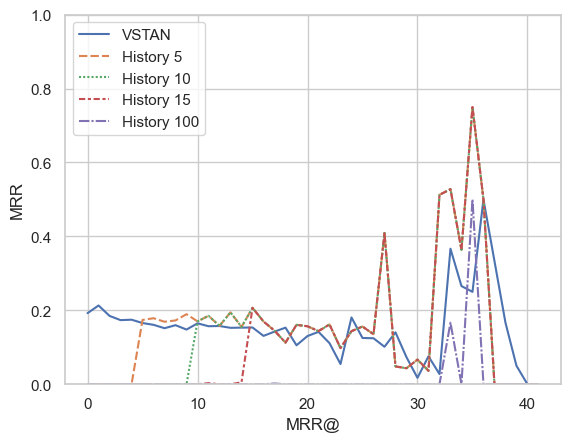

In [34]:
sns.lineplot(data=mrr_df)

# set y-axis name to 'MRR'
plt.ylabel('MRR')
# set y-axis limit to 1
plt.ylim(0, 1)
plt.savefig(plot_save_path + 'MRR_vs_cutoff.png', dpi=300)

In [35]:
# to latex table
mrr_df.to_latex()

'\\begin{tabular}{lrrrrr}\n\\toprule\n & VSTAN & History 5 & History 10 & History 15 & History 100 \\\\\nMRR@ &  &  &  &  &  \\\\\n\\midrule\n0 & 0.192343 & 0.000151 & 0.000061 & 0.000069 & 0.000530 \\\\\n1 & 0.213099 & 0.000153 & 0.000150 & 0.000127 & 0.000102 \\\\\n2 & 0.184941 & 0.000055 & 0.000318 & 0.000077 & 0.000124 \\\\\n3 & 0.173483 & 0.000332 & 0.000210 & 0.000105 & 0.000092 \\\\\n4 & 0.174696 & 0.000114 & 0.000111 & 0.000413 & 0.000573 \\\\\n5 & 0.165588 & 0.174056 & 0.000098 & 0.000228 & 0.000075 \\\\\n6 & 0.160820 & 0.178645 & 0.000130 & 0.000388 & 0.000000 \\\\\n7 & 0.151588 & 0.169095 & 0.000338 & 0.000000 & 0.000000 \\\\\n8 & 0.159832 & 0.172655 & 0.000000 & 0.000000 & 0.000048 \\\\\n9 & 0.147953 & 0.189517 & 0.000076 & 0.000406 & 0.000310 \\\\\n10 & 0.164836 & 0.170077 & 0.170077 & 0.000000 & 0.000000 \\\\\n11 & 0.157031 & 0.185168 & 0.185168 & 0.002976 & 0.000000 \\\\\n12 & 0.157573 & 0.157898 & 0.157898 & 0.000000 & 0.000000 \\\\\n13 & 0.152674 & 0.194586 & 0.194586 

## Hit rate evaluation

In [36]:
hit_df = pd.read_excel(
    "Results summarized.xlsx",
    sheet_name='HIT.T',
    index_col=0)

hit_df.head()

,VSTAN,History 5,History 10,History 15,History 100
HIT@,,,,,
0,0.489949,0.000988,0.000635,0.000635,0.001906
1,0.540080,0.001402,0.001402,0.001001,0.000801
2,0.532583,0.000568,0.000994,0.000994,0.001279
3,0.516224,0.000985,0.001182,0.000788,0.000985
4,0.521307,0.001344,0.001613,0.001613,0.002151


In [37]:
print(hit_df.to_latex(index=True, 
                      float_format="%.5f",
                      ))

\begin{tabular}{lrrrrr}
\toprule
 & VSTAN & History 5 & History 10 & History 15 & History 100 \\
HIT@ &  &  &  &  &  \\
\midrule
0 & 0.48995 & 0.00099 & 0.00064 & 0.00064 & 0.00191 \\
1 & 0.54008 & 0.00140 & 0.00140 & 0.00100 & 0.00080 \\
2 & 0.53258 & 0.00057 & 0.00099 & 0.00099 & 0.00128 \\
3 & 0.51622 & 0.00099 & 0.00118 & 0.00079 & 0.00099 \\
4 & 0.52131 & 0.00134 & 0.00161 & 0.00161 & 0.00215 \\
5 & 0.51964 & 0.52369 & 0.00075 & 0.00112 & 0.00112 \\
6 & 0.52056 & 0.51539 & 0.00149 & 0.00248 & 0.00000 \\
7 & 0.49898 & 0.51014 & 0.00068 & 0.00000 & 0.00000 \\
8 & 0.51099 & 0.51902 & 0.00000 & 0.00000 & 0.00091 \\
9 & 0.48596 & 0.51703 & 0.00122 & 0.00122 & 0.00365 \\
10 & 0.50349 & 0.52517 & 0.52517 & 0.00000 & 0.00000 \\
11 & 0.49923 & 0.50670 & 0.50670 & 0.00446 & 0.00000 \\
12 & 0.49095 & 0.51453 & 0.51453 & 0.00000 & 0.00000 \\
13 & 0.49614 & 0.53184 & 0.53184 & 0.00000 & 0.00000 \\
14 & 0.50962 & 0.48485 & 0.48485 & 0.01010 & 0.00000 \\
15 & 0.50207 & 0.56944 & 0.56944 & 0.5694

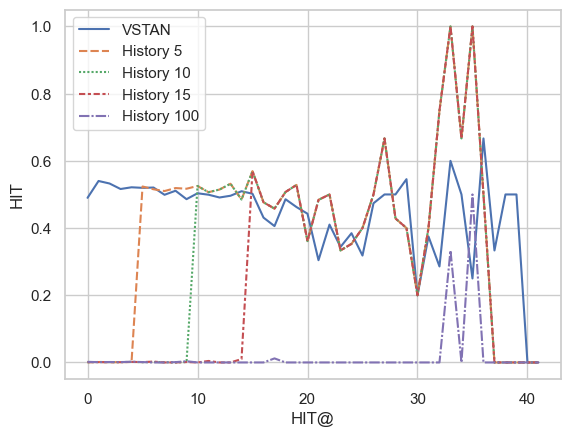

In [38]:
sns.lineplot(data=hit_df)
plt.ylabel('HIT')
plt.savefig(plot_save_path + 'HIT_vs_cutoff.png', dpi=300)